In [119]:
from src.bootstrap_error_analysis import *
from src.run_gsort_v2_wuericmod import get_significant_electrodes, get_vision_data
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
# %matplotlib ipympl
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ANALYSIS_BASE = "/Volumes/Analysis/"
gsort_path = "/Volumes/Scratch/Users/praful/triplet_gsort_v2_30um_raphe-affinity_cosine"
dataset = "2020-09-29-2"
estim = "data007/data007-all"
wnoise = "kilosort_data002/data002"
thr_factor = 1
p = 1
n = 124

In [6]:
relevant_movies, total_probs, edge_probs, clusters, edges, electrodes = get_bootstrap_information(ANALYSIS_BASE, gsort_path,dataset, estim, wnoise,p,n)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Scratch/Users/ajphillips/papers/temporal_dithering_shah/gsort_jeff_exp/2022-02-08-1/data012/data000/p103'

In [ ]:
make_surface_plot(relevant_movies, total_probs, ANALYSIS_BASE,dataset, estim, p, n)

In [ ]:
dss, dss_stack, num_electrodes, num_samples, movie_stack= get_difference_signals(relevant_movies,clusters,edges,ANALYSIS_BASE, dataset, estim,p, electrodes)

In [ ]:
plt.figure()
ax = plt.subplot(111)
ax.plot(dss_stack[:100,0,:].T, color = "C0")
plt.show()

In [ ]:
average_ds, average_error_stack,std_error_stack, shifted_dss, shifted_dss_stack,error, error_stack = compute_average_diff_signal_and_error(dss,dss_stack, num_electrodes, num_samples)

In [ ]:
plt.figure()
ax = plt.subplot(212)
ax.plot(shifted_dss_stack[error_stack[:,0]> average_error[0],0,:].T, color = "C0")
ax.plot(average_ds[0,:].T, color = "C1")
ax.set_title("Bad spikes")
ax = plt.subplot(211)
ax.plot(shifted_dss_stack[error_stack[:,0]< average_error[0],0,:].T, color = "C0")
ax.plot(average_ds[0,:].T, color = "C1")

ax.set_title("Good spikes")
per_good_spikes = np.mean(error_stack[:,0]< average_error[0])
plt.suptitle(f"% good spikes = {per_good_spikes}")
plt.show()

In [ ]:
mean_edge_error = get_mean_edge_error(error)

In [ ]:
new_edge_probs = get_modified_edge_probs(mean_edge_error, edge_probs,average_error)

In [ ]:
new_total_probs = np.array([np.sum(p) for p in new_edge_probs])

In [ ]:
plt.figure()
ax = plt.subplot(111)
ax.hist(new_total_probs-total_probs, bins = 20);

In [ ]:
make_surface_plot(relevant_movies, new_total_probs, ANALYSIS_BASE,dataset, estim, p, n)

# Lollipop analysis

In [163]:
ANALYSIS_BASE = "/Volumes/Analysis/"
gsort_path = "/Volumes/Scratch/Users/ajphillips/papers/temporal_dithering_shah/gsort_jeff_exp/"
dataset = "2022-02-08-1"
estim = "data007"
wnoise = "streamed/data000"
thr_factor = 1
ps = [int(p[1:]) for p in os.listdir(os.path.join(gsort_path, dataset, estim)) if 'p' in p]
n = 4906

In [164]:
vcd = get_vision_data(ANALYSIS_BASE, dataset, wnoise)

In [165]:
relevant_movies, total_probs, edge_probs, clusters, edges, electrodes,num_trials = get_bootstrap_information(ANALYSIS_BASE, gsort_path,dataset, estim, "",ps,n, electrodes_stored = False)


6160it [00:31, 192.90it/s]


In [166]:
ei = vcd.get_ei_for_cell(n).ei
noise = vcd.channel_noise
electrodes = get_significant_electrodes(ei, ['mixed', 'soma'], noise)

In [167]:
dss, dss_stack, dss_inds, num_electrodes, num_samples, movie_stack= get_difference_signals(relevant_movies,clusters,edges,ANALYSIS_BASE, dataset, estim, electrodes)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6160/6160 [10:11<00:00, 10.08it/s]


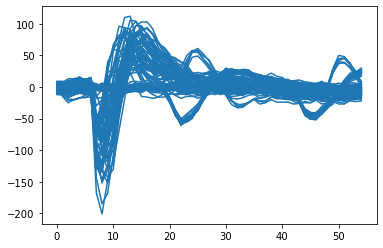

In [168]:
plt.figure()
ax = plt.subplot(111)
ax.plot(dss_stack[:100,0,:].T, color = "C0")
plt.show()

In [169]:
average_ds, average_error,std_error, shifted_dss, shifted_dss_stack,error, error_stack = compute_average_diff_signal_and_error(dss,dss_stack, num_electrodes, num_samples)

KeyboardInterrupt: 

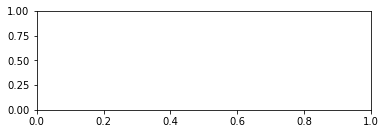

In [145]:
test_set = [0,1,2, 3, 4]
electrode = 1
factor = 0
plot_spike_split_on_electrode(shifted_dss_stack,average_ds, error_stack,average_error, std_error, factor,electrode , test_set)

In [170]:
mean_edge_error = get_mean_edge_error(error)

In [171]:
test_set = [i for i in range(len(electrodes))]
factor = 0
new_edge_probs = get_modified_edge_probs(mean_edge_error, edge_probs,average_error,std_error, factor, test_set)

In [172]:
new_total_probs = np.array([np.sum(p) for p in new_edge_probs])

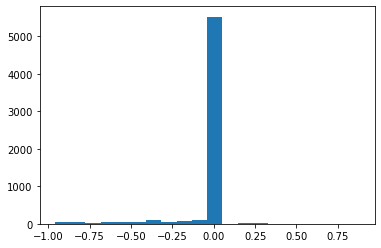

In [173]:
plt.figure()
ax = plt.subplot(111)
ax.hist(new_total_probs-total_probs, bins = 20);

In [174]:
len(edge_probs)

6160

In [176]:
test_set = [0,1,2]
electrode = 0
factor = 0
new_instance_probs = get_instance_modified_edge_probs(edge_probs, error, dss_inds, average_error, std_error, factor, test_set,num_trials)

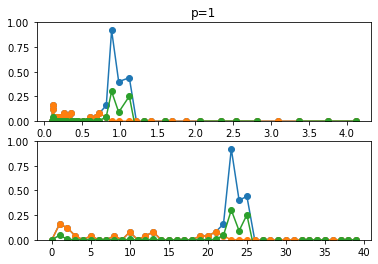

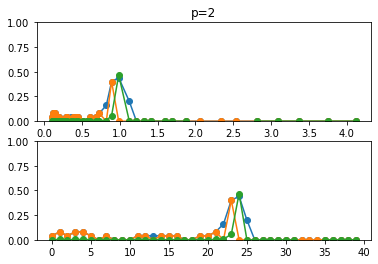

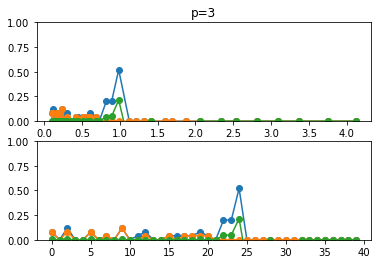

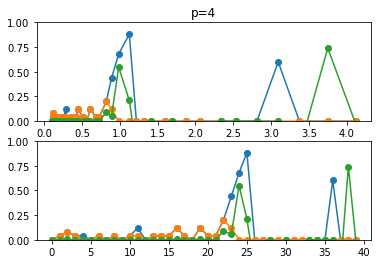

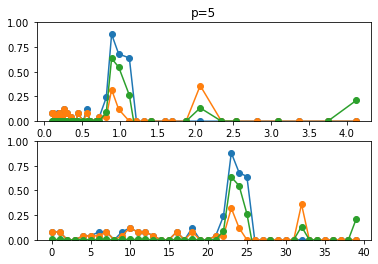

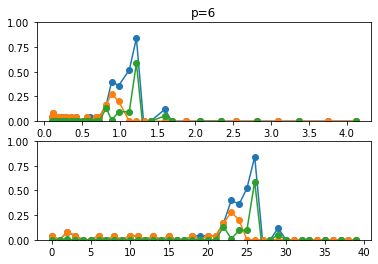

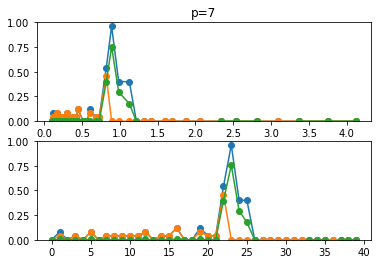

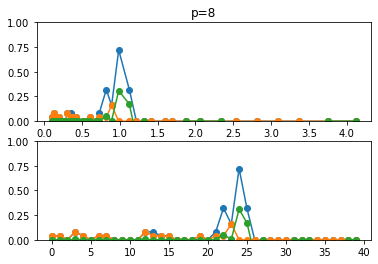

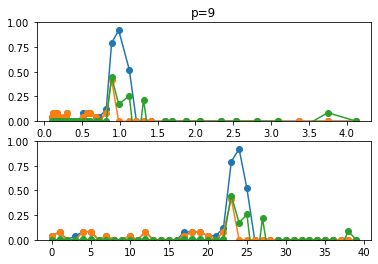

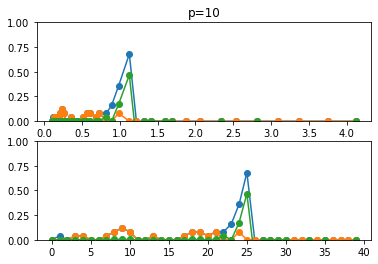

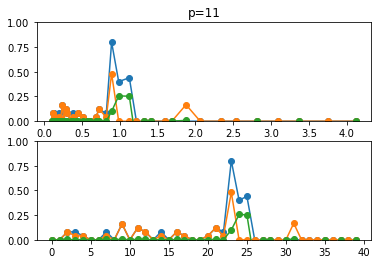

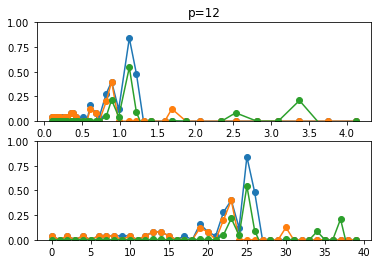

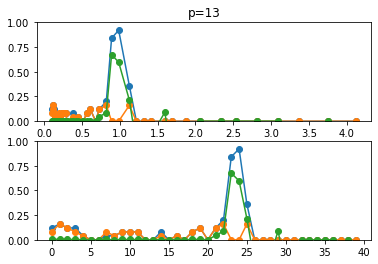

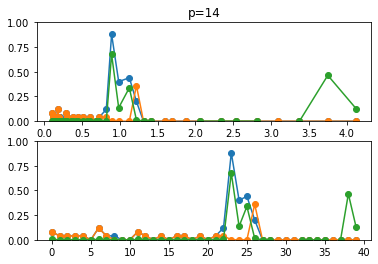

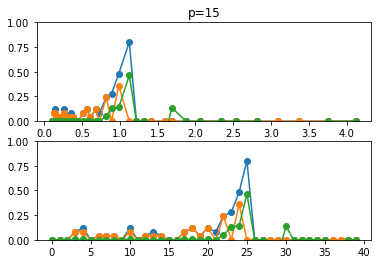

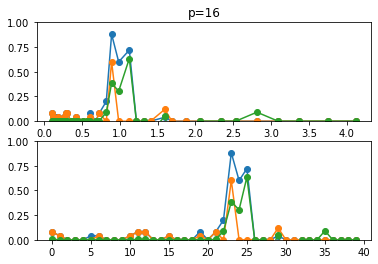

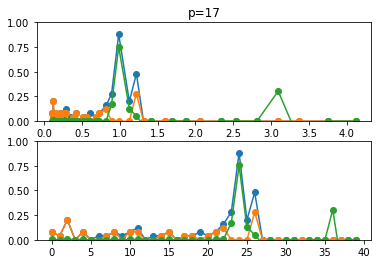

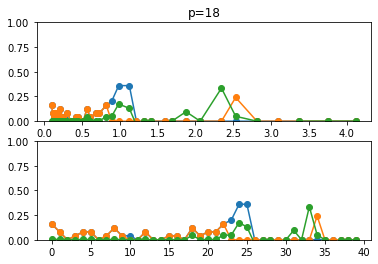

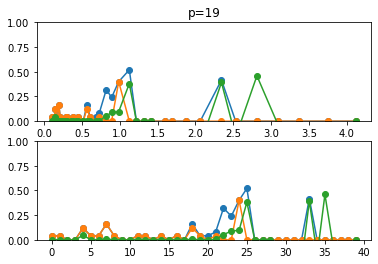

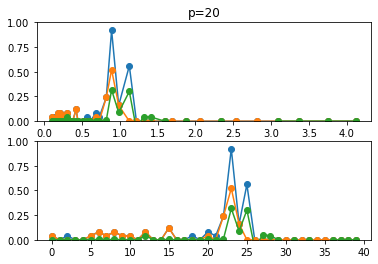

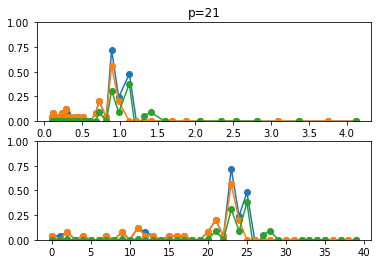

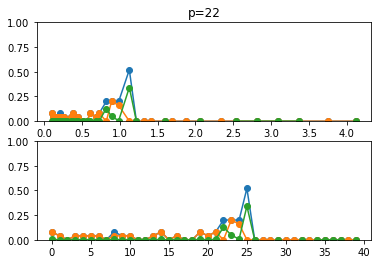

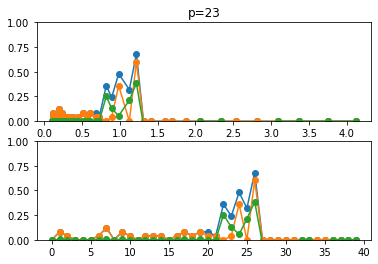

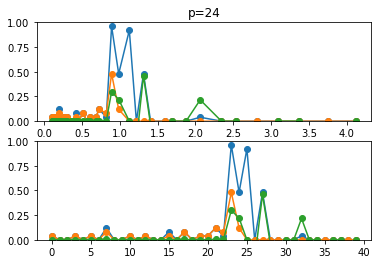

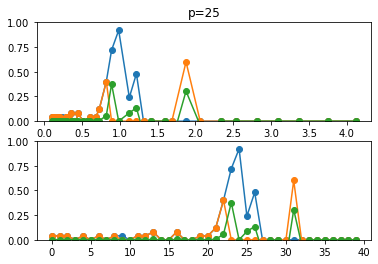

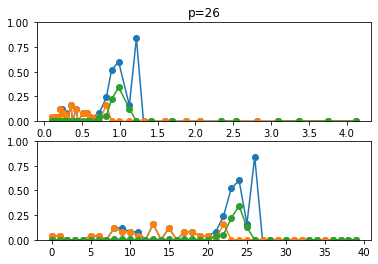

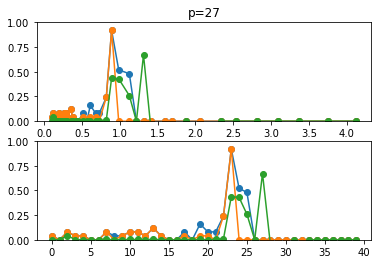

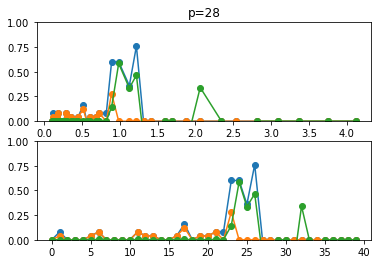

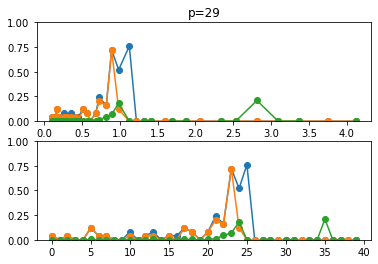

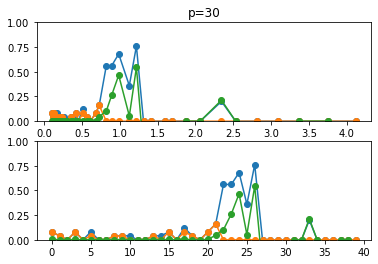

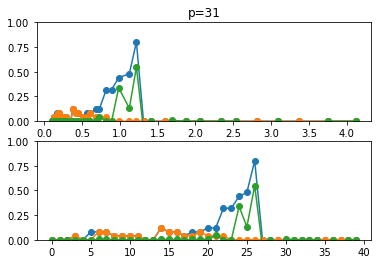

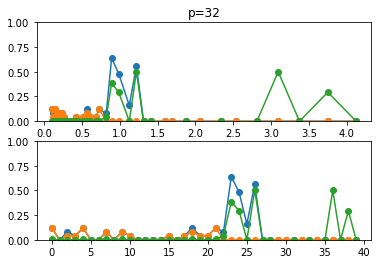

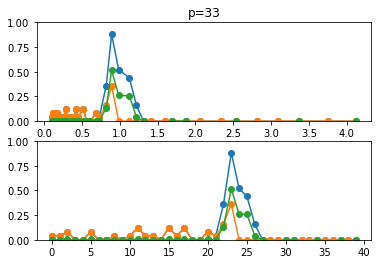

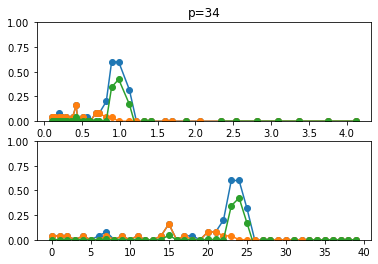

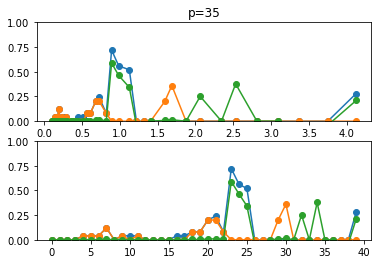

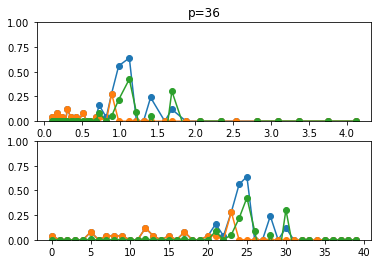

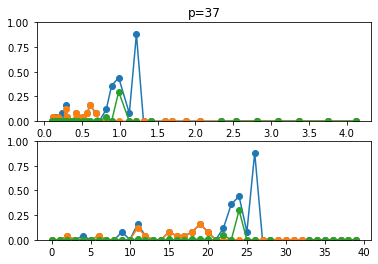

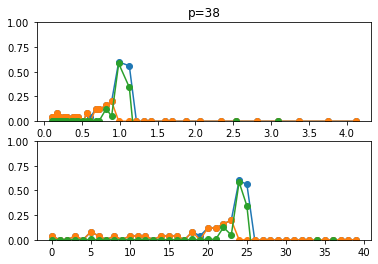

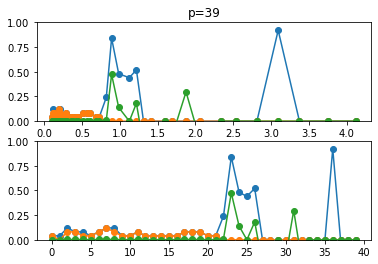

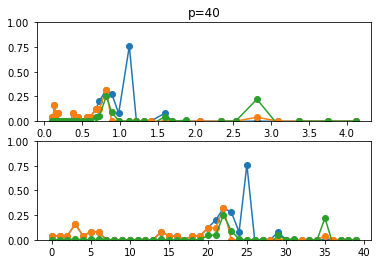

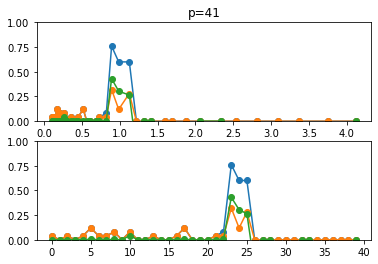

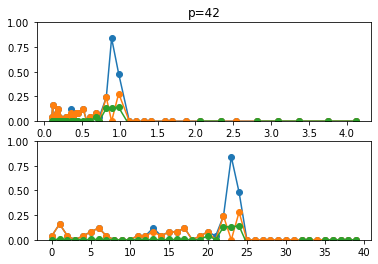

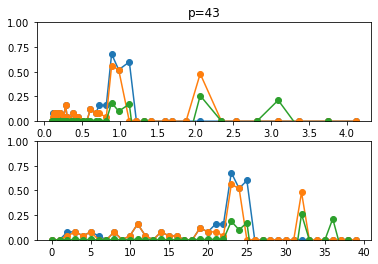

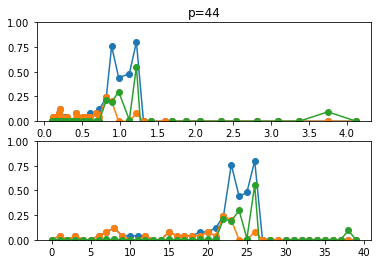

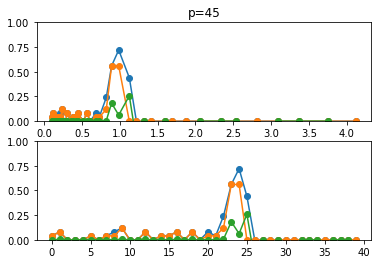

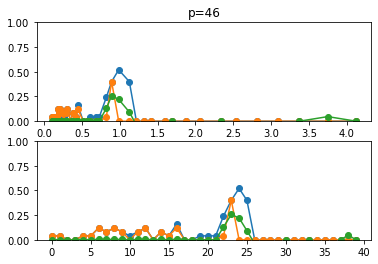

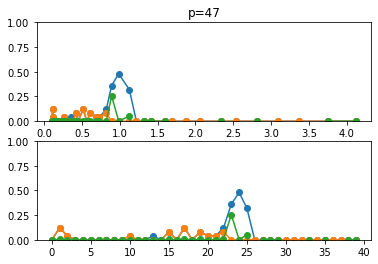

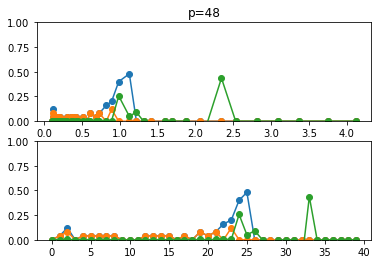

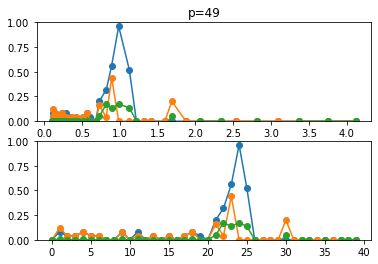

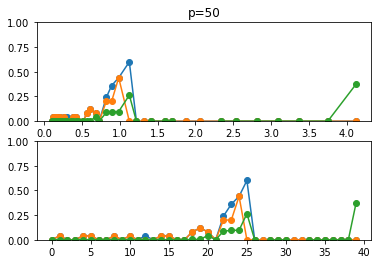

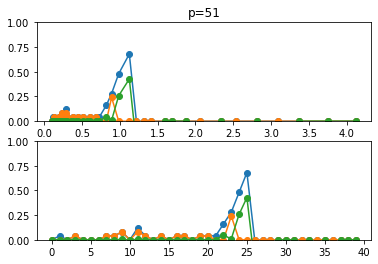

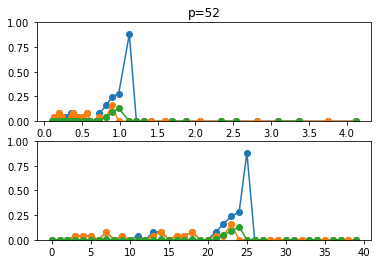

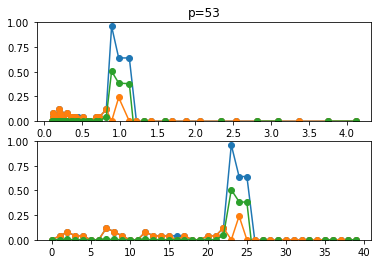

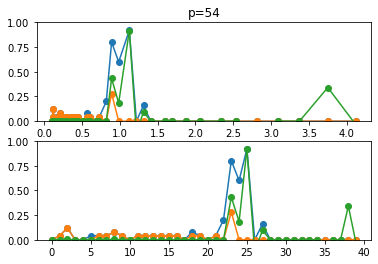

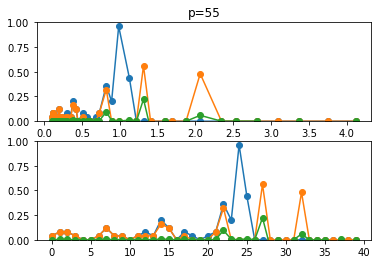

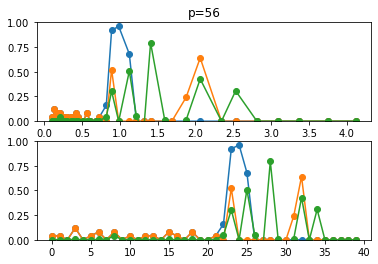

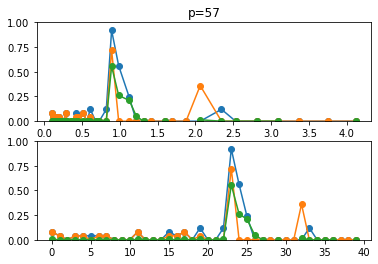

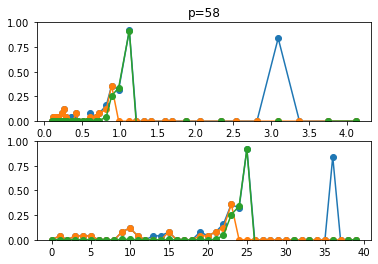

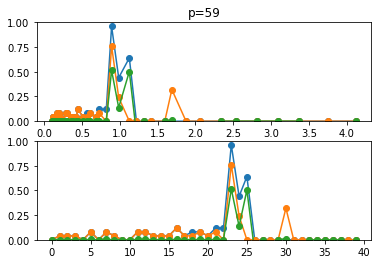

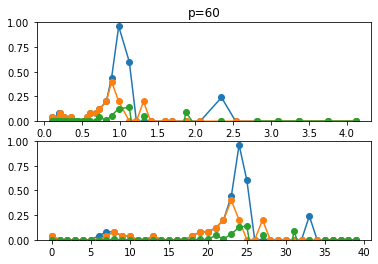

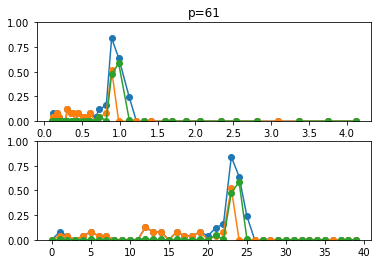

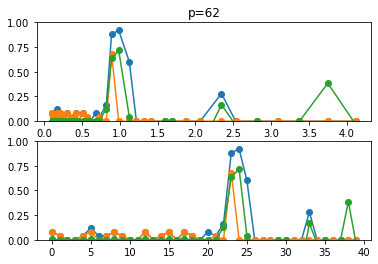

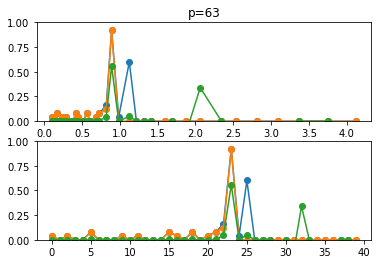

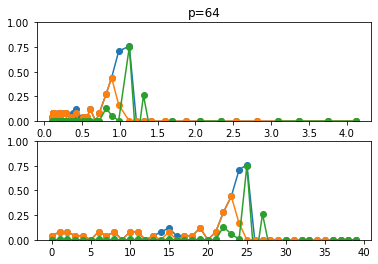

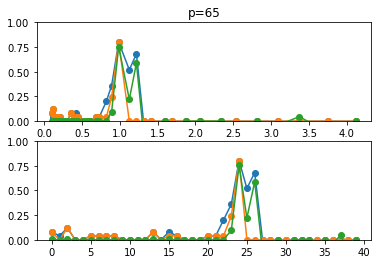

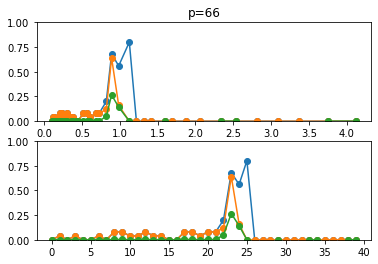

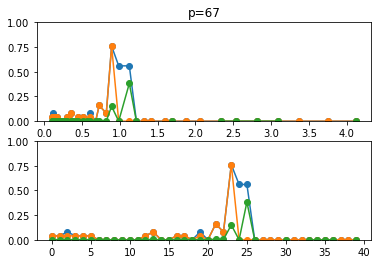

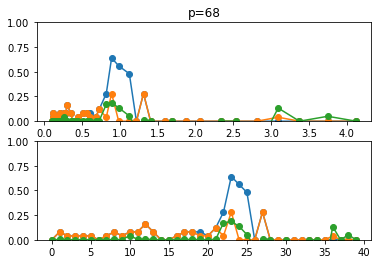

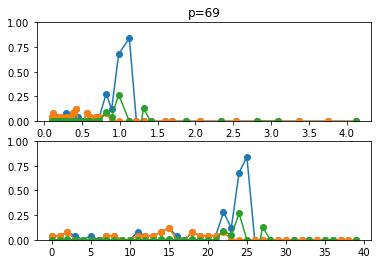

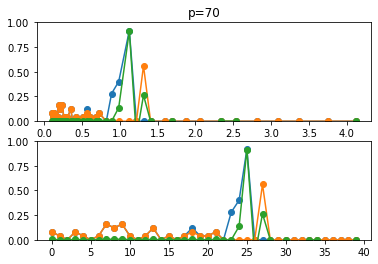

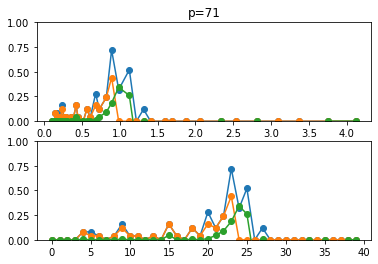

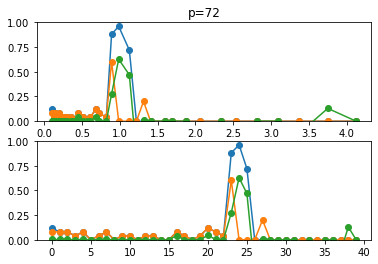

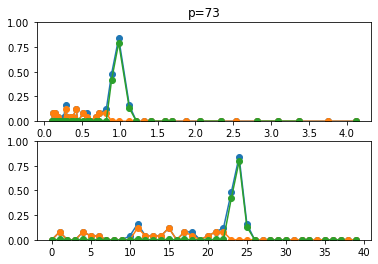

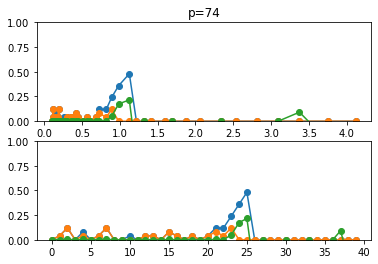

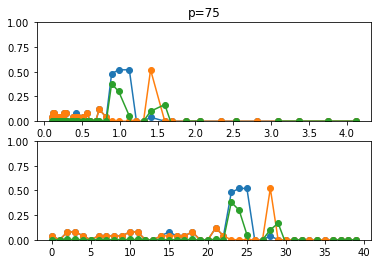

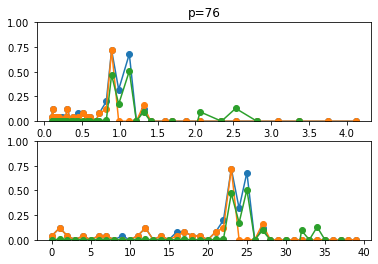

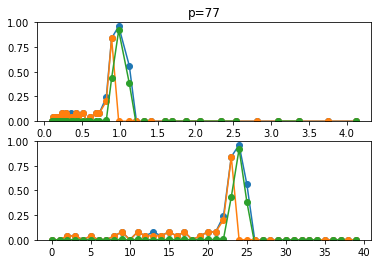

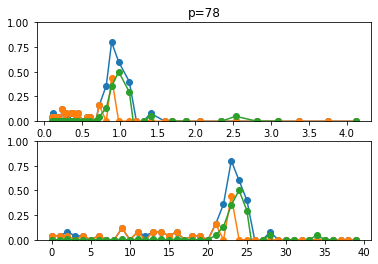

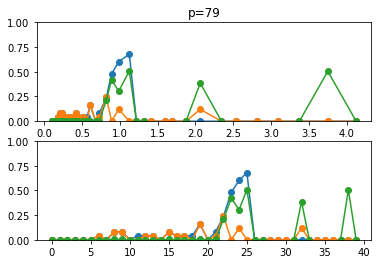

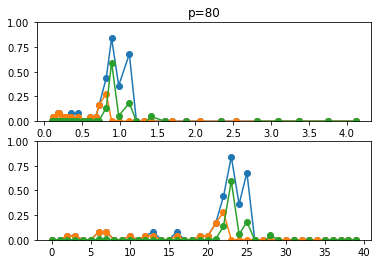

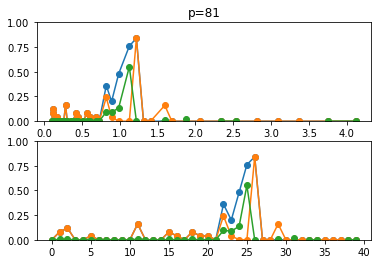

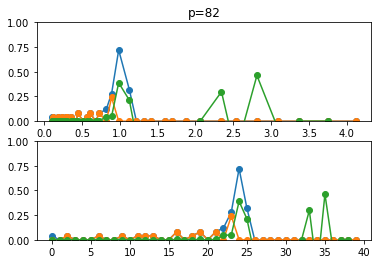

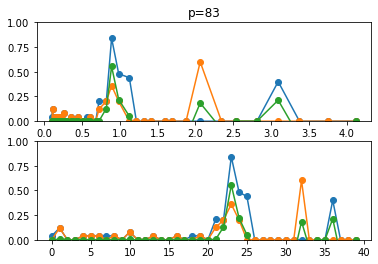

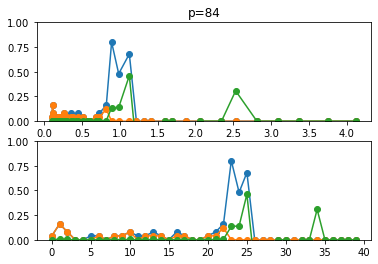

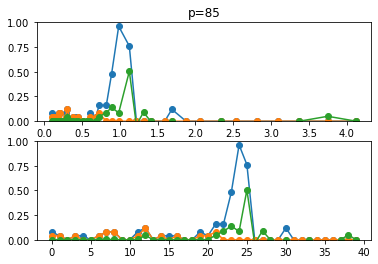

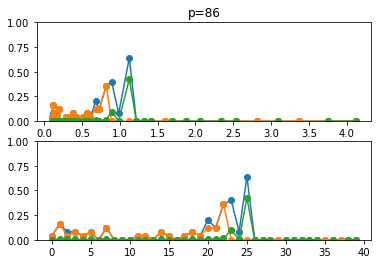

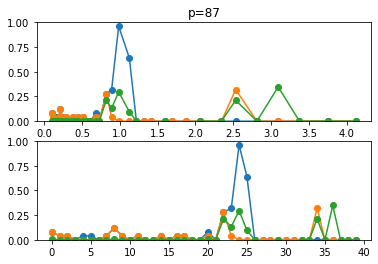

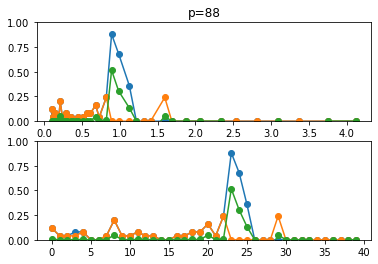

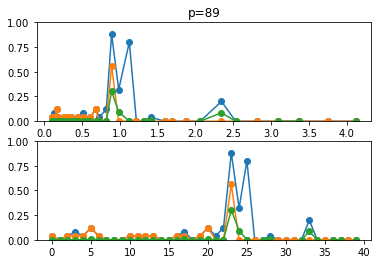

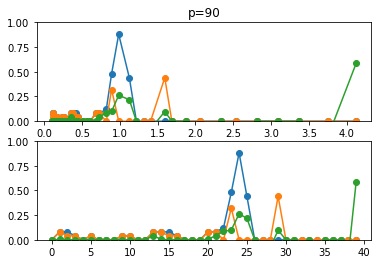

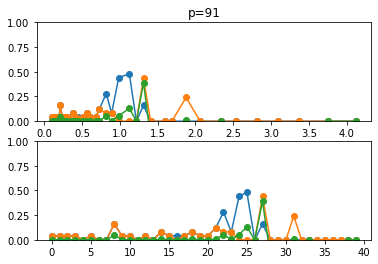

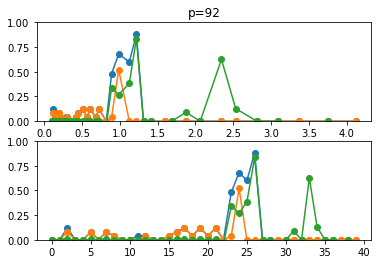

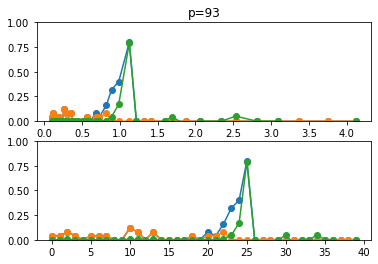

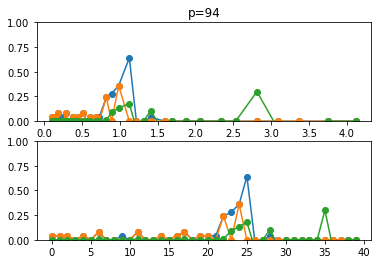

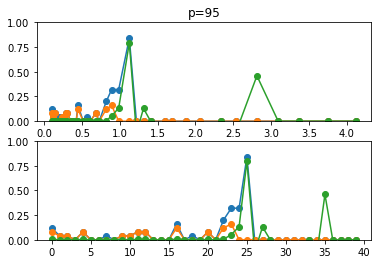

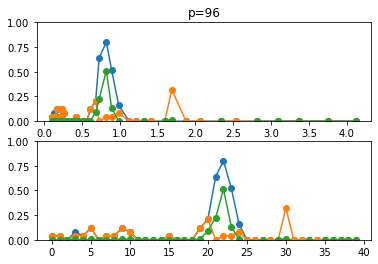

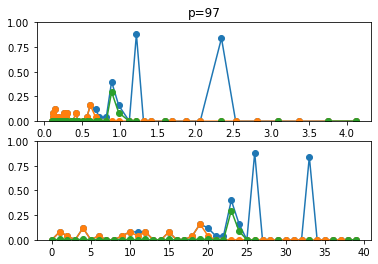

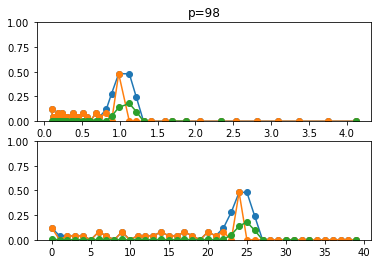

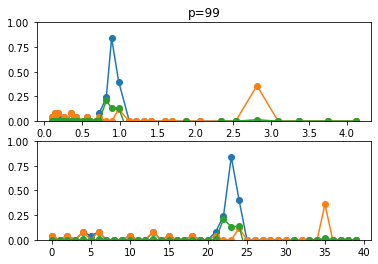

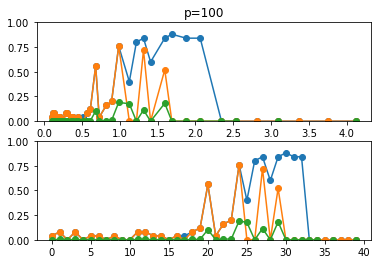

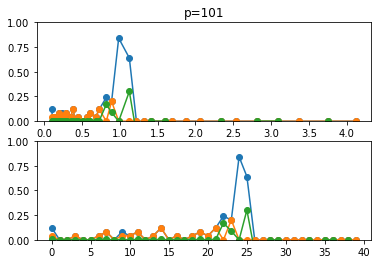

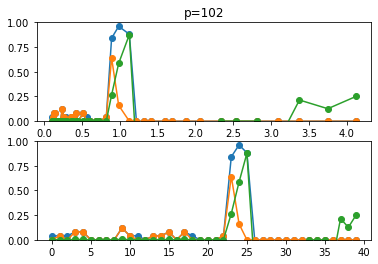

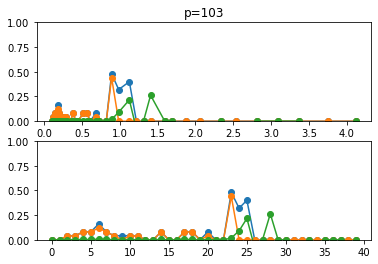

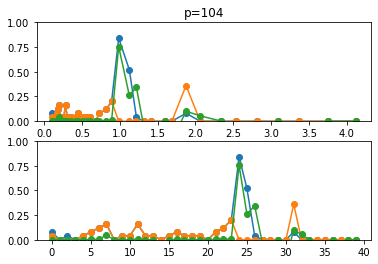

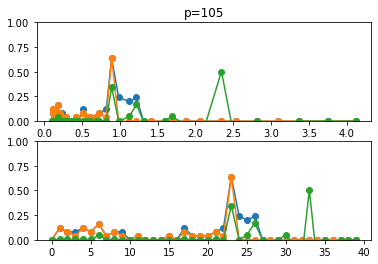

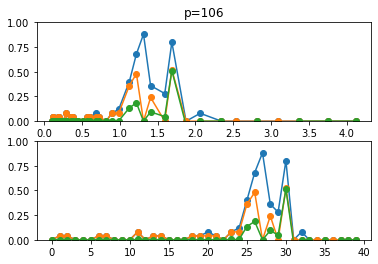

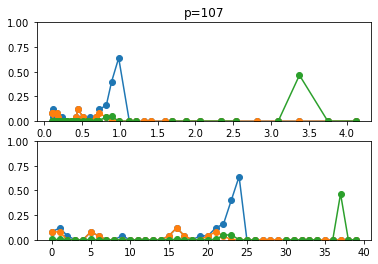

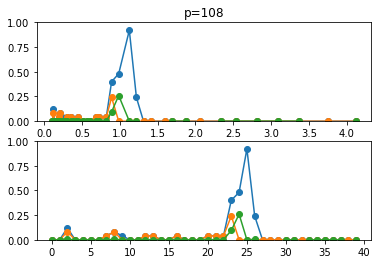

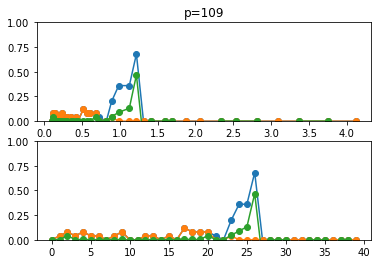

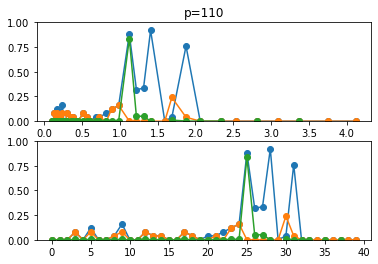

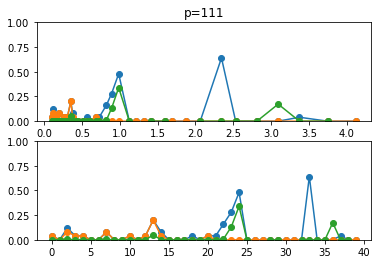

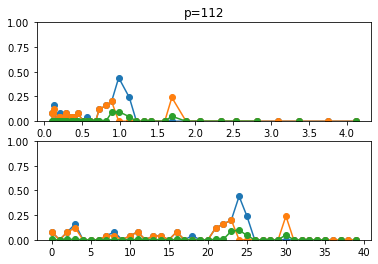

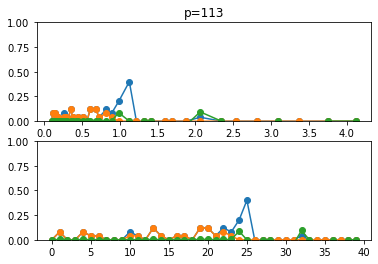

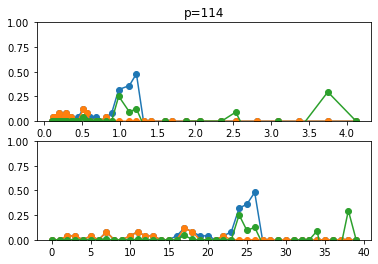

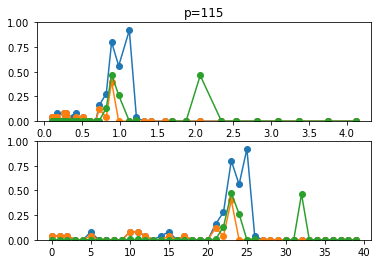

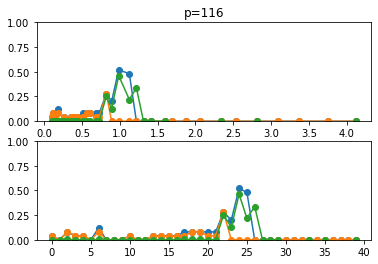

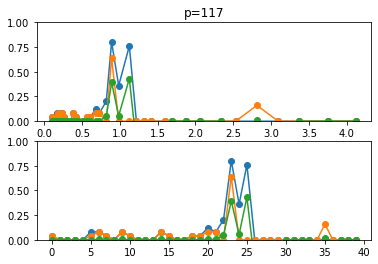

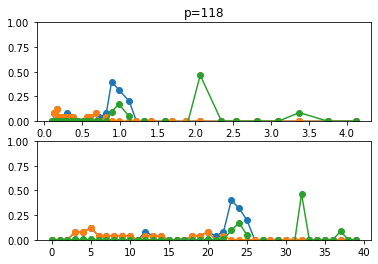

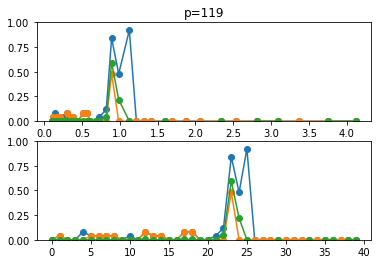

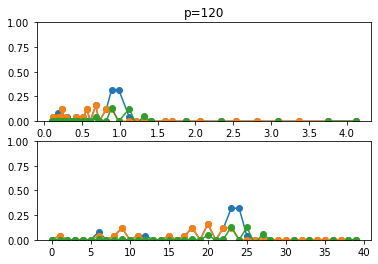

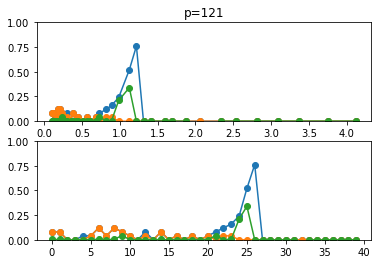

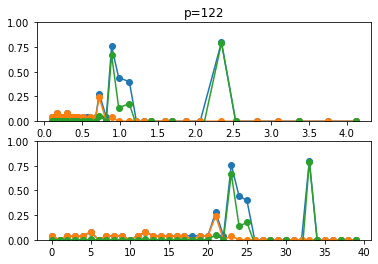

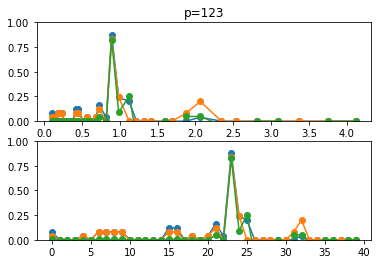

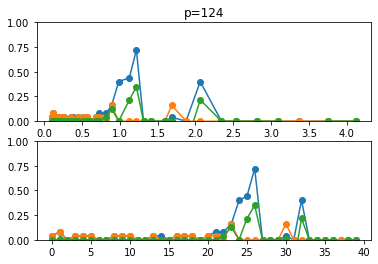

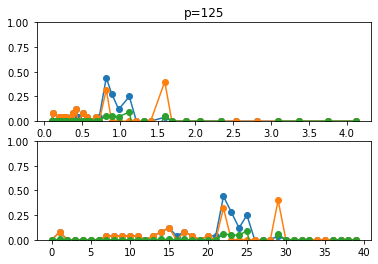

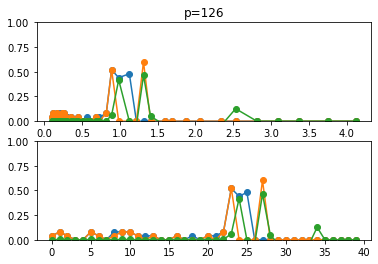

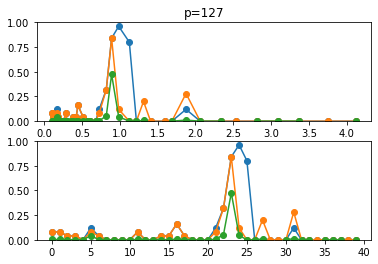

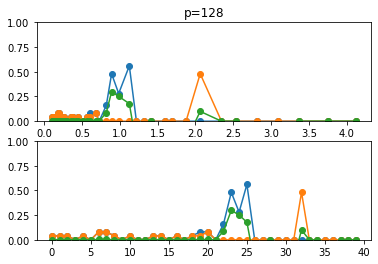

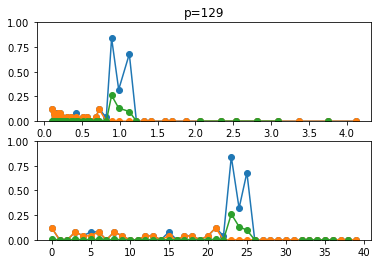

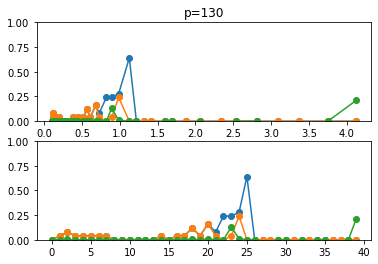

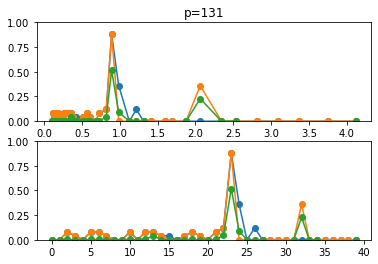

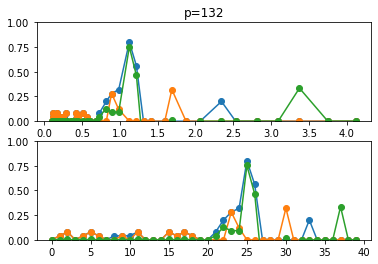

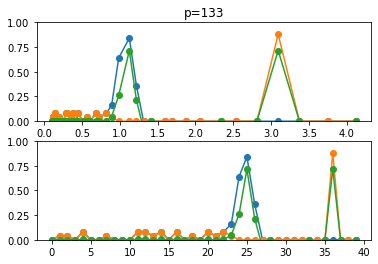

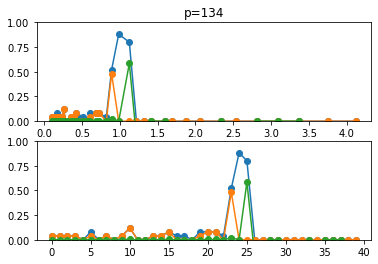

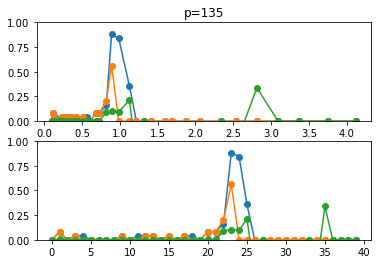

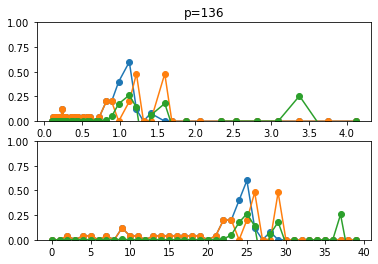

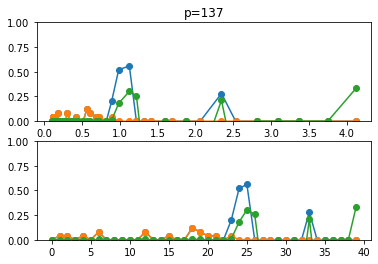

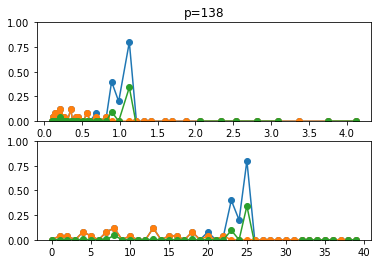

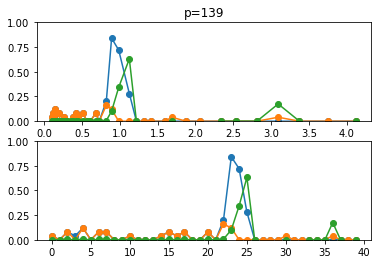

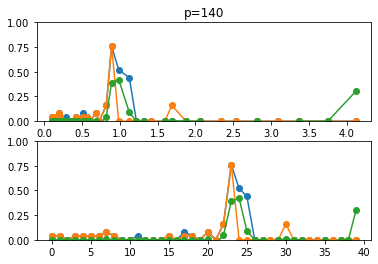

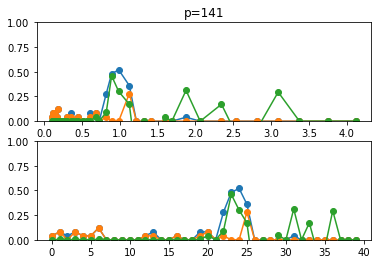

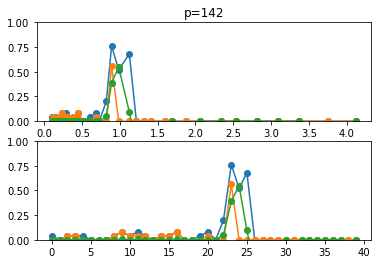

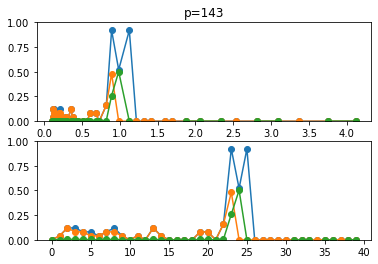

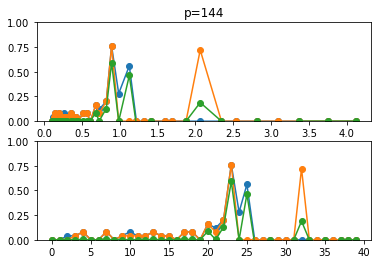

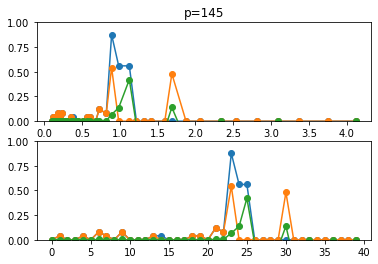

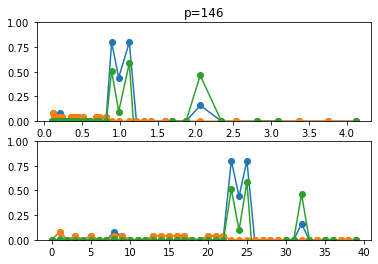

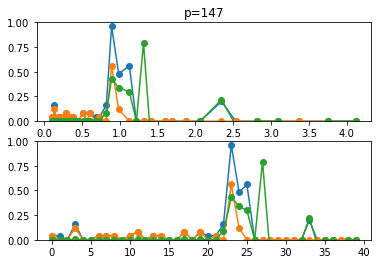

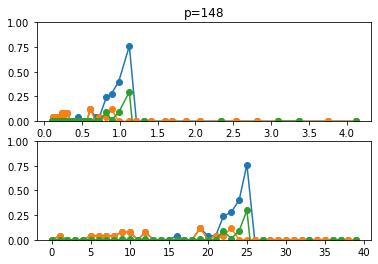

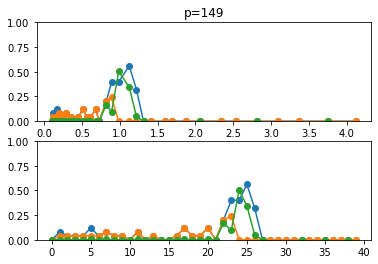

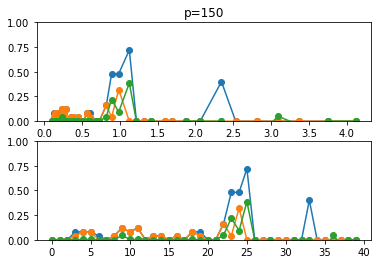

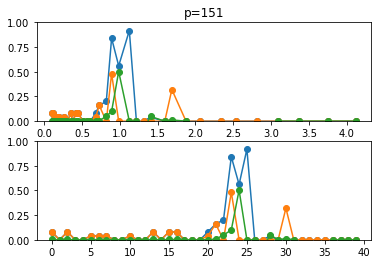

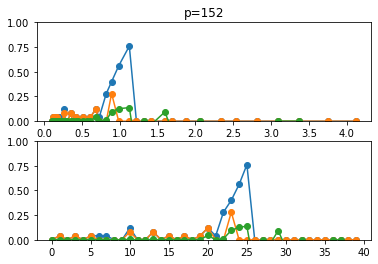

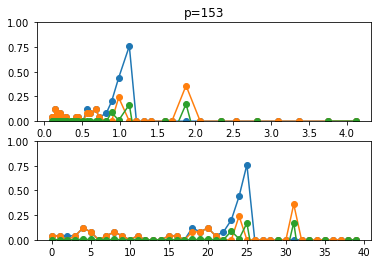

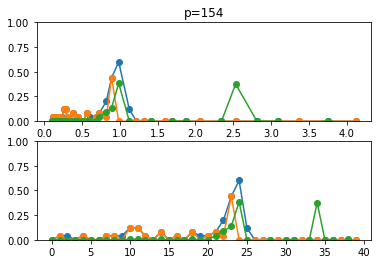

In [177]:
make_lollipop_comparison_plot(relevant_movies, total_probs, new_total_probs, new_instance_probs, ANALYSIS_BASE,dataset, estim)
